# Assignment 4
-------
## Particulars

This assignment is due Friday May 10, 2019. The last commit at (or before) 11h59 on that date will be graded for credit.

__Note that this departs from our usual deadline.__ This is because the assignment is being released slightly later than usual.

It must be turned in (committed) to your private repository on the course's github organization located at [github.com/orgs/mgt-416-2019](https://github.com/orgs/mgt-416-2019).

__Commit early and commit often. And be sure to push.__

-------
## Types of Problems and Evaluation

On this assignment there are two types of questions: <span style="color:red">Technical</span> and <span style="color:blue">Analytical</span>.

The primary goal of a <span style="color:red">technical</span> problem is to carry out the requested coding/computational analysis and output or visualize the result. In these problems the primary factors in evaluation are: does the code/analysis work; does it do what it is supposed to do; is it comprehensible (_i.e._ commented [always] and explained [in cases where code is very involved]).

The primary goal of an <span style="color:blue">analytical</span> problem is to answer a question about some network(s) or data being certain to justifying your answer with a well thought out, and presented, line of reasoning. In these problems the primary factors in evaluation are: is the answer well thought out and it well presented and intelligibile (you are strongly advised to make use of [markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [magics](http://ipython.readthedocs.io/en/stable/interactive/magics.html) _ex_. %%latex or $\latex$ in your answers).

Each problem and question has associated with it a number of points that it will be graded out of. Please use the point values as a guide as to how much time/effort should be devoted to each question.

-------
## Instructions

Complete each of the problems found below to the best of your abilities. It is highly advisable that you at least attempt each problem/question.

After the cell proposing each problem there is a markdown cell in which your mark for each question will be recorded and a code cell in which your total mark for that problem will be stored. __Do not edit these cells.__

Following the marking cells there is a series of cells you may use to complete each question. Feel free to add additional markdown and code cells as required.

If you encounter any major issues, require clarification and/or you believe there is an error in a question or the data, do not hesitate to email me at: [orion.penner@epfl.ch](mailto:orion.penner@epfl.ch).

-------
## Imports

The packages imported below are necessary for completing the assignment.

If there are other packages you are used to using that you wish to import, please feel free to do so __provided__ the package is __fully installable through pip__. If you want clarification on this, please email me.

In [3]:
# Allows matplotlib figures inline
%matplotlib inline
# Our standard network analysis module. Please use as nx so I may read code more easily.
import networkx as nx
# Our standard ploting module. Again, please use as plt.
import matplotlib.pyplot as plt
# Numpy makes some vector manipulations easier
import numpy as np
# This makes it easier to load the growing network
import csv
# This lets us keep the dates clean within the growing network dictionary
import time

---
## Problem 1
17 points.

In this problem you will explore the growth and evolution of the bitcoin OTC trust network. Within this network a link with weight greater than zero indicates that the "out" user trusts the "in" user.

1. Using the code provided, progressively load the links of this network into the CurrentNetwork graph and at the end of each Quarter, make a copy of CurrentNetwork that is a snapshot of the network at that point in time (the provided code take care of all of this). Looping over the QuarterlyNetworks dictionary, print a brief summary of the statistics of each quarterly network. [<span style="color:red">Technical</span>] [1]
2. Plot, as a function of time, the following quantities:  [<span style="color:red">Technical</span>] [4]
    * The number of nodes in the network.
    * The number of edges in the network.
    * The average degree of nodes in the network.
    * The density of the network.
    * The average clustering coefficient of the network.
3. Focusing first on the number of nodes and edges, what trends do you note in these plots? [<span style="color:blue">Analytical</span>] [1]
4. Now focusing on average degree and density, what trend(s) do you note? Are they what you would have expected from what you noted in Question 2. Is this in line with what we would generally expect from an online network (see Lecture 8). [<span style="color:blue">Analytical</span>] [2]
5. Consider the average cluster coefficient. What is the trend here? Is this consistent with the trends found across the four previous measures? Why? [<span style="color:blue">Analytical</span>] [2]
6. Now let us consider links coming into the network. To do this we will use networkx's built in difference function, but to use that we must make sure we have the same node set across all networks. To get to that point, run the code found below under the heading 1.6. Then use the networkx function "difference" find the difference network between each quarter network and its previous quarter. For example, nx.difference(QuarterlyNetworks_AllNodes["01-07-2011"], QuarterlyNetworks_AllNodes["01-04-2011"]) returns a network containing all the links generated between 01-04-2011 and 01-07-2011. Print a brief summary of the statistics of each of these difference networks. [<span style="color:red">Technical</span>] [1]
7. Taking the network of links created between 01-04-2011 and 01-07-2011, calculate the average in degree of nodes on the "in" side of a new link. To do this, use the in degree of each node as it is in the 01-04-2011 snapshot. Thus, exclude nodes that do not exist yet in the 01-04-2011 snapshot (this requires you use the QuarterlyNetworks["01-04-2011"] network, __not__ QuarterlyNetworks_AllNodes["01-04-2011"]). This quantity should be weighted by the number of times a given node participates in a new link in the "in" role. [<span style="color:red">Technical</span>] [3]
8. Repeat the previous calculation, but for out degree. [<span style="color:red">Technical</span>] [1]
9. What do you note about the average in and out degree of nodes participating in new links? How do these quantities compare to the averge degree of the 01-04-2011 quarterly snapshot? Does preferential attachment seem to be in play? [<span style="color:blue">Analytical</span>] [2]

#### Problem 1 Grades

1.1) None/1

1.2) None/4

1.3) None/1

1.4) None/2

1.5) None/2

1.6) None/1

1.7) None/3

1.8) None/1

1.9) None/2

Total: None/17

In [16]:
Problem1Score = None

---

In [17]:
fin = open("soc-sign-bitcoinotc.csv",'r')
NetworkLines = [row for row in csv.reader(fin,delimiter=',')]

CurrentNetwork = nx.DiGraph()
QuarterlyNetworks = {}
TriggerDates = [[(2010,12),'01-01-2011'], [(2011,3),'01-04-2011'], [(2011,6),'01-07-2011'], [(2011,9),'01-10-2011'], 
                [(2011,12),'01-01-2012'], [(2012,3),'01-04-2012'], [(2012,6),'01-07-2012'], [(2012,9),'01-10-2012'], 
                [(2012,12),'01-01-2013'], [(2013,3),'01-04-2013'], [(2013,6),'01-07-2013'], [(2013,9),'01-10-2013'], 
                [(2013,12),'01-01-2014'], [(2014,3),'01-04-2014'], [(2014,6),'01-07-2014'], [(2014,9),'01-10-2014'], 
                [(2014,12),'01-01-2015'], [(2015,3),'01-04-2015'], [(2015,6),'01-07-2015'], [(2015,9),'01-10-2015'], 
                [(2015,12),'01-01-2016'], [(2016,3),'01-04-2016']
               ]
TriggerDateIndex = 0
for row in NetworkLines:
    StructuredDate = time.gmtime(float(row[3]))
    if StructuredDate.tm_year > TriggerDates[TriggerDateIndex][0][0] or StructuredDate.tm_year == TriggerDates[TriggerDateIndex][0][0] and StructuredDate.tm_mon > TriggerDates[TriggerDateIndex][0][1]:
        print("Done ",TriggerDates[TriggerDateIndex][1])
        QuarterlyNetworks[TriggerDates[TriggerDateIndex][1]] = CurrentNetwork.copy()
        QuarterlyNetworks[TriggerDates[TriggerDateIndex][1]].name = TriggerDates[TriggerDateIndex][1]
        TriggerDateIndex += 1

    if int(row[2]) > 0:
        CurrentNetwork.add_edge(row[0],row[1])

Done  01-01-2011
Done  01-04-2011
Done  01-07-2011
Done  01-10-2011
Done  01-01-2012
Done  01-04-2012
Done  01-07-2012
Done  01-10-2012
Done  01-01-2013
Done  01-04-2013
Done  01-07-2013
Done  01-10-2013
Done  01-01-2014
Done  01-04-2014
Done  01-07-2014
Done  01-10-2014
Done  01-01-2015
Done  01-04-2015
Done  01-07-2015
Done  01-10-2015
Done  01-01-2016


In [18]:
OrderedDates = [DateTuple[1] for DateTuple in TriggerDates[:-1]]

---

### 1.1

1. Using the code provided, progressively load the links of this network into the CurrentNetwork graph and at the end of each Quarter, make a copy of CurrentNetwork that is a snapshot of the network at that point in time (the provided code take care of all of this). Looping over the QuarterlyNetworks dictionary, print a brief summary of the statistics of each quarterly network. [<span style="color:red">Technical</span>] [1]

In [19]:
for date in OrderedDates:
    print('Network situation on {}'.format(date))
    print(' ')
    print(nx.info(QuarterlyNetworks[date]))
    print('----------------------')

Network situation on 01-01-2011
 
Name: 01-01-2011
Type: DiGraph
Number of nodes: 55
Number of edges: 142
Average in degree:   2.5818
Average out degree:   2.5818
----------------------
Network situation on 01-04-2011
 
Name: 01-04-2011
Type: DiGraph
Number of nodes: 186
Number of edges: 675
Average in degree:   3.6290
Average out degree:   3.6290
----------------------
Network situation on 01-07-2011
 
Name: 01-07-2011
Type: DiGraph
Number of nodes: 1237
Number of edges: 5479
Average in degree:   4.4293
Average out degree:   4.4293
----------------------
Network situation on 01-10-2011
 
Name: 01-10-2011
Type: DiGraph
Number of nodes: 1446
Number of edges: 6773
Average in degree:   4.6840
Average out degree:   4.6840
----------------------
Network situation on 01-01-2012
 
Name: 01-01-2012
Type: DiGraph
Number of nodes: 1631
Number of edges: 7745
Average in degree:   4.7486
Average out degree:   4.7486
----------------------
Network situation on 01-04-2012
 
Name: 01-04-2012
Type: DiG

### 1.2

Plot, as a function of time, the following quantities: [Technical] [4]

The number of nodes in the network.

The number of edges in the network.

The average degree of nodes in the network.

The density of the network.

The average clustering coefficient of the network.

In [20]:
info_name = ['number_of_nodes','number_of_edges','avg_degree','density','avg_clus_coeff']

In [21]:
def nx_infos(QuarterlyNetworks,OrderedDates,info_name):
    
    number_of_nodes = {date:len(QuarterlyNetworks[date].nodes()) for date in OrderedDates}
    number_of_edges = {date:len(QuarterlyNetworks[date].edges()) for date in OrderedDates}
    avg_degree = {date:np.mean(list(dict(nx.degree(QuarterlyNetworks[date])).values())) for date in OrderedDates}
    density = {date: nx.density(QuarterlyNetworks[date]) for date in OrderedDates}
    QuarterlyNetworks_undirected = {date: QuarterlyNetworks[date].to_undirected() for date in OrderedDates}
    avg_clus_coeff = {date:nx.average_clustering(QuarterlyNetworks_undirected[date]) for date in OrderedDates}
    
    info_list = [number_of_nodes,number_of_edges,avg_degree,density,avg_clus_coeff]
    info_dict = {info_name[i]:info_list[i] for i in range(0,len(info_name))}

    return info_dict

In [22]:
info_dict = nx_infos(QuarterlyNetworks,OrderedDates,info_name)

In [23]:
def plot_info(info_dict,info_name, OrderedDates):
    
    number_of_infos = len(info_name)
    
    for i in range(len(info_name)):
        plt.figure(figsize=(8,5))
        plt.plot(list(info_dict[info_name[i]].values()))

        plt.title('Evolution of {}'.format(info_name[i]))
        plt.xticks(range(len(OrderedDates)), OrderedDates, rotation=45)
        plt.show()

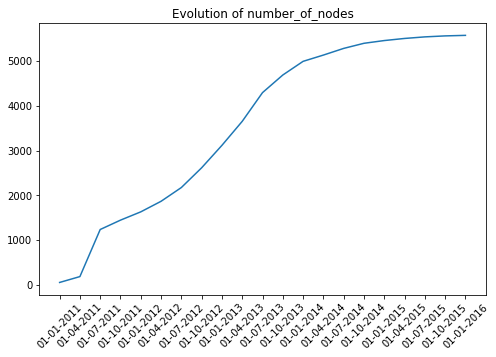

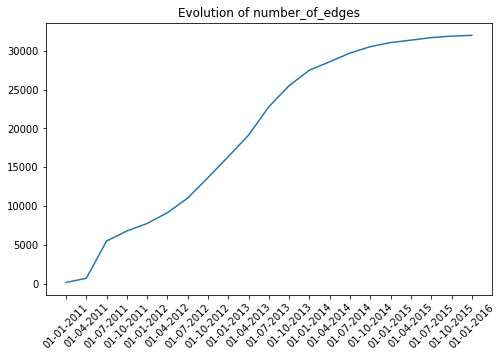

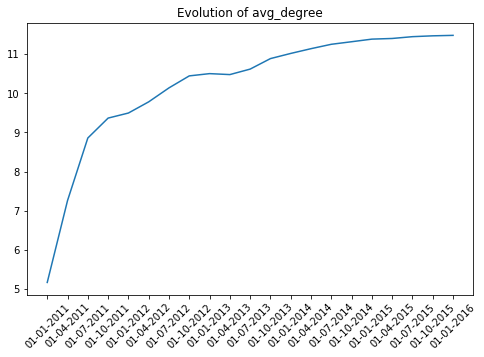

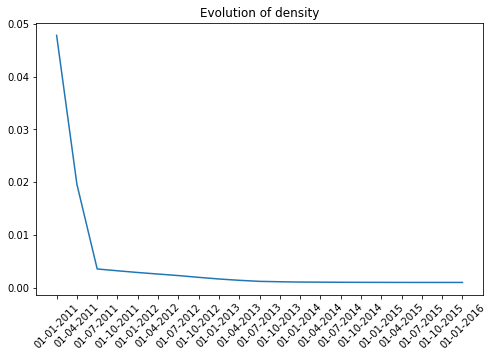

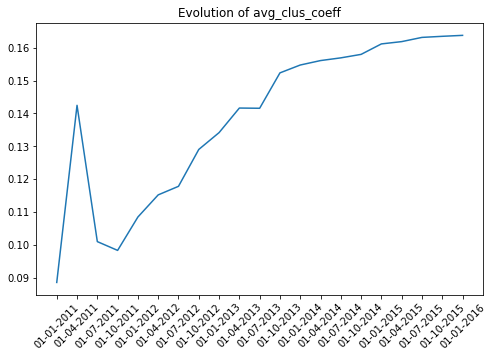

In [24]:
plot_info(info_dict,info_name, OrderedDates)

### 1.3

3. Focusing first on the number of nodes and edges, what trends do you note in these plots? [<span style="color:blue">Analytical</span>] [1]

The number of nodes grows quite linearly until reaching a sort of plateau at some point where the expansion slows down

### 1.4

4. Now focusing on average degree and density, what trend(s) do you note? Are they what you would have expected from what you noted in Question 2. Is this in line with what we would generally expect from an online network (see Lecture 8). [<span style="color:blue">Analytical</span>] [2]

As the number of nodes increases, the potential of connections increases twice faster since it is proportional to $n^{2}$. SInce this value is in the denominator, the **density** will decrease very quickly towards zero. Since it is already small, over the time, it is not going to decrease significantly.

As more nodes appear, the edges will connect to already existing nodes, which obvioulsy will make the ** average degree** value higher

In general, it is what we expect from an online network with nodes representing people and edges the friendship.

### 1.5

5. Consider the average cluster coefficient. What is the trend here? Is this consistent with the trends found across the four previous measures? Why? [<span style="color:blue">Analytical</span>] [2]

If we take a online social network, the shape of the trend could be explained as such:
The first people talk about it in their group of friends, which creates a trend of people joining the network, but there is a high probability that those friends are also friends togethe, which creates a peak.
As the word goes around, more and more people are added, which decreases the clustering coefficient at first. With the trend, lot of people join and eventually close the possible triads which gives a rise to the avg clusering coefficient

    

### 1.6

 6. Now let us consider links coming into the network. To do this we will use networkx's built in difference function, but to use that we must make sure we have the same node set across all networks. To get to that point, run the code found below under the heading 1.6. Then use the networkx function "difference" find the difference network between each quarter network and its previous quarter. For example, nx.difference(QuarterlyNetworks_AllNodes["01-07-2011"], QuarterlyNetworks_AllNodes["01-04-2011"]) returns a network containing all the links generated between 01-04-2011 and 01-07-2011. Print a brief summary of the statistics of each of these difference networks. [<span style="color:red">Technical</span>] [1]

In [25]:
all_nodes = CurrentNetwork.nodes() #All nodes of the final version of the network
QuarterlyNetworks_AllNodes = {}

for date, graph in QuarterlyNetworks.items(): #For all snapshots used previously, just add all the nodes not already in it
    g2 = graph.copy()
    for n in CurrentNetwork.nodes():
        if n not in g2.nodes():
            g2.add_node(n)
    
    QuarterlyNetworks_AllNodes[date] = g2

In [26]:
for i in range(len(OrderedDates)-1):
    date1 = OrderedDates[i]
    date2 = OrderedDates[i+1]
    d = nx.difference(QuarterlyNetworks_AllNodes[date2], QuarterlyNetworks_AllNodes[date1])
    
    print(nx.info(d))
    print('--------------------------------')
    print(' ')

Name: 01-04-2011
Type: DiGraph
Number of nodes: 5573
Number of edges: 533
Average in degree:   0.0956
Average out degree:   0.0956
--------------------------------
 
Name: 01-07-2011
Type: DiGraph
Number of nodes: 5573
Number of edges: 4804
Average in degree:   0.8620
Average out degree:   0.8620
--------------------------------
 
Name: 01-10-2011
Type: DiGraph
Number of nodes: 5573
Number of edges: 1294
Average in degree:   0.2322
Average out degree:   0.2322
--------------------------------
 
Name: 01-01-2012
Type: DiGraph
Number of nodes: 5573
Number of edges: 972
Average in degree:   0.1744
Average out degree:   0.1744
--------------------------------
 
Name: 01-04-2012
Type: DiGraph
Number of nodes: 5573
Number of edges: 1388
Average in degree:   0.2491
Average out degree:   0.2491
--------------------------------
 
Name: 01-07-2012
Type: DiGraph
Number of nodes: 5573
Number of edges: 1890
Average in degree:   0.3391
Average out degree:   0.3391
--------------------------------
 


### 1.7

7. Taking the network of links created between 01-04-2011 and 01-07-2011, calculate the average in degree of nodes on the "in" side of a new link. To do this, use the in degree of each node as it is in the 01-04-2011 snapshot. Thus, exclude nodes that do not exist yet in the 01-04-2011 snapshot (this requires you use the QuarterlyNetworks["01-04-2011"] network, __not__ QuarterlyNetworks_AllNodes["01-04-2011"]). This quantity should be weighted by the number of times a given node participates in a new link in the "in" role. [<span style="color:red">Technical</span>] [3]

In [27]:
date1 = '01-04-2011'
date2 = '01-07-2011'
g1 = QuarterlyNetworks[date1]
nodesg1 = g1.nodes()

g2 = QuarterlyNetworks[date2]
nodesg2 = g2.nodes()

newnodes = list(set(nodesg2)-set(nodesg1))
indegrees_g2 = g2.in_degree()
newnodes_indegree = {node: indegrees_g2[str(node)] for node in newnodes}
average_in_degree = np.mean(list(newnodes_indegree.values()))

In [28]:
print('Average in degree of new nodes: {:.3f}'.format(average_in_degree))

Average in degree of new nodes: 3.557


### 1.8

In [29]:
outdegrees_g2 = g2.out_degree()
newnodes_outdegree = {node: outdegrees_g2[str(node)] for node in newnodes}
average_out_degree = np.mean(list(newnodes_outdegree.values()))
print('Average out degree of new nodes: {:.3f}'.format(average_out_degree))

Average out degree of new nodes: 3.582


### 1.9

9. What do you note about the average in and out degree of nodes participating in new links? How do these quantities compare to the averge degree of the 01-04-2011 quarterly snapshot? Does preferential attachment seem to be in play? [<span style="color:blue">Analytical</span>] [2]

The two average degrees are very similar. Since it is an online social network, it seems reasonable that friendship goes in two ways, ths adding a friendship in one way also means in the other way around. They are in the same range (very close)

---
## Problem 2
20 points.

Here we will explore the SIR model on the US flight network.

1. Install the ndlib package and make sure ndlib imports found below work. We will use this to simulate the SIR process. Documentation and examples for this package can be found [here](http://ndlib.readthedocs.io/en/latest/overview.html). Once ndlib is working, run all of the pre-prepared functions included below. [<span style="color:red">Technical</span>] [1]
2. Load the network 'USFlightNetwork.graphml' and print a summary. [<span style="color:red">Technical</span>] [1]
3. Using the InitializeSIRModel function below, initialize a SIR model in which Newark airport is the only node initially infected. Use the parameters $\beta = 0.01$ and $\gamma = 0.01$. Run this model for a number of iterations sufficient for the infection to die out (_i.e._ no infected nodes are left). Plot the trends using ndlib's DiffusionTrend function. [<span style="color:red">Technical</span>] [1]
4. How many iterations did it take for the infection to die out in the previous question? How many nodes did the infection spread to in total? How many iterations did it take for the outbreak peak (in terms of number of nodes infected)? [<span style="color:blue">Analytical</span>] [3]
5. Using the AverageOverSimulations and PlotTrends functions provided below, plot the averaged trends for an outbreak beginning at Newark. Use the same model initialized in Question 3. Choose the number of iterations inline with what you identified in Question 4. Average over 100 simulations. [<span style="color:red">Technical</span>] [1]
6. In the averaged plots, does the outbreak seem to die out after the same number of iterations as the single run (Question 3)? Is the total fraction of nodes infected the same as what you identified in Question 4. Does the peak in the number of infected nodes occur at the same number of iterations? [<span style="color:blue">Analytical</span>] [3]
7. Initialize a model in which the outbreak starts at Minot, North Dakota. Use the same values of $\beta$ and $\gamma$ as you have previously. Use the AverageOverSimulations and PlotTrends functions to run this model and plot its averaged trends. Use the same number of iterations and simulation runs as you did for Newark in Question 5. [<span style="color:red">Technical</span>] [1]
8. When the outbreak starts at Minot, does it end earlier or later than when it started at Newark? Does it infect more, or less, nodes in total? [<span style="color:blue">Analytical</span>] [2]
9. Use the PlotComparison function found below to directly compare the trends obtained for Newark and Minot. First make a plot in which x_max is set to the total number of iterations used in the models. Second, make a plot in which x_max is set to only 25. [<span style="color:red">Technical</span>] [1]
10. Read these plots carefully. What does the asymptotic value of the "recovered curve" tell us? Which outbreak reaches further? Which outbreak peaks more quickly? Is there a simple statistics/measure that may explain the differences we see between these two outbreaks? [<span style="color:blue">Analytical</span>] [3]
11. Now initialize a model in which the outbreak starts at Chicago. Use the same values of $\beta$ and $\gamma$ as you have previously. Use the AverageOverSimulations and PlotTrends functions to run this model and plot its averaged trends. Use the same number of iterations and simulation runs as you did for Newark in Questions 5 and 7. [<span style="color:red">Technical</span>] [1]
12. Use the PlotComparison function to compare the trends obtained for Newark and Chicago. Is there a significance between the two. If yes, to what do you attribute this. If no, make a guess as to why they are not different. [<span style="color:blue">Analytical</span>] [2]


#### Problem 2 Grades

2.1) None/1

2.2) None/1

2.3) None/1

2.4) None/3

2.5) None/1

2.6) None/3

2.7) None/1

2.8) None/2

2.9) None/1

2.10) None/3

2.11) None/1

2.12) None/2

Total: None/20

In [30]:
Problem2Score = None

---

In [31]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics.SIRModel as sir
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend 

no display found. Using non-interactive Agg backend


In [32]:
def InitializeSIRModel(InitialInfected, Network, beta=0.01, gamma=0.01): #note that InitialInfected is a list of node ids
    sir_model = sir.SIRModel(Network) #create the ndlib model object
    
    #initialize the parameters
    sir_cfg = mc.Configuration()
    sir_cfg.add_model_parameter('beta', beta)
    sir_cfg.add_model_parameter('gamma', gamma)
    
    sir_cfg.add_model_initial_configuration('Infected', InitialInfected) #infect the nodes at which the infection starts

    sir_model.set_initial_status(sir_cfg)

    return sir_model#, sir_iter, trends

In [33]:
def AverageOverSimulations(model, n_nodes, n_iterations=100, n_simulations = 100): #n_nodes has to be the number of nodes in the network
    susceptible_count_mean = np.zeros(n_iterations)
    infected_count_mean = np.zeros(n_iterations)
    removed_count_mean = np.zeros(n_iterations)
    
    for i in range(n_simulations):  #execute the simulations n_simulations times
        iterations = model.iteration_bunch(n_iterations)  #execute this model n_iterations steps
        trends = model.build_trends(iterations)
        model.reset()  # reset the model
    
        susceptible_count_mean = susceptible_count_mean + np.array(trends[0]['trends']['node_count'][0])
        infected_count_mean = infected_count_mean + np.array(trends[0]['trends']['node_count'][1])
        removed_count_mean = removed_count_mean + np.array(trends[0]['trends']['node_count'][2])
        
    #Average over simulation runs, normalize by number of nodes and put in a dictionary
    Counts = {}
    Counts["susceptible"] = susceptible_count_mean/(n_simulations*n_nodes)
    Counts["infected"] = infected_count_mean/(n_simulations*n_nodes)
    Counts["removed"] = removed_count_mean/(n_simulations*n_nodes)
    
    return Counts

In [34]:
def PlotTrends(CountDictionary, title = None):
    n_iterations = len(CountDictionary["susceptible"])
    
    plt.figure(figsize=(10,6))
    plt.xlim(0, n_iterations)
    plt.plot(range(n_iterations), CountDictionary["susceptible"], label = 'Susceptible', color = 'steelblue')
    plt.plot(range(n_iterations), CountDictionary["infected"], label = 'Infected', color = 'lightblue')
    plt.plot(range(n_iterations), CountDictionary["removed"], label = 'Removed', color = 'orange')
    plt.xlabel('Iterations', fontsize=25)
    plt.ylabel('Fraction of nodes', fontsize=25)
    plt.title(title)
    plt.legend(fontsize=15)
    plt.show()

In [35]:
def PlotComparison(CountDictionary_1, CountDictionary_2, title=None, x_max = None):
    if x_max == None:
        x_max = max(len(CountDictionary_1["susceptible"]),len(CountDictionary_2["susceptible"]))
    
    DifferencedCountDictionary = {}
    for key in CountDictionary_1:
        DifferencedCountDictionary[key] = CountDictionary_1[key] - CountDictionary_2[key]
    
    plt.figure(figsize=(10,6))
    #having an x_max that can be independent of the number of iterations allows us to zoom in
    plt.xlim(0, x_max)
    plt.plot(range(x_max), DifferencedCountDictionary["susceptible"][:x_max], label = 'Susceptible', color = 'steelblue')
    plt.plot(range(x_max), DifferencedCountDictionary["infected"][:x_max], label = 'Infected', color = 'lightblue')
    plt.plot(range(x_max), DifferencedCountDictionary["removed"][:x_max], label = 'Removed', color = 'orange')
    plt.xlabel('Iterations', fontsize=25)
    plt.ylabel('Fraction of nodes', fontsize=25)
    plt.title(title)
    plt.legend(fontsize=15)
    plt.plot(range(x_max), x_max*[0.0], color='black')#this just adds a baseline at y=0
    plt.show()

In [36]:
# These are some specific airports we will use.
Newark   = "11618"
Chicago  = "13930"
Minot = "13433"

---

### 2.1

In [37]:
!pip install ndlib

### 2.2

In [38]:
G_USFlight = nx.read_graphml('USFlightNetwork.graphml')
print(nx.info(G_USFlight))

Name: 
Type: DiGraph
Number of nodes: 610
Number of edges: 7919
Average in degree:  12.9820
Average out degree:  12.9820


### 2.3

In [39]:
def infection_model(infected_node, graph):
    
    sir_model = InitializeSIRModel(infected_node, graph, beta=0.01, gamma=0.01)
    n_infected = len(infected_node)
    model_iterations=list()
    while n_infected != 0:
        iteration = sir_model.iteration()
        n_infected = iteration['node_count'][1]
        model_iterations.append(iteration)
    
    n_interation = model_iterations[-1]['iteration']
    return sir_model, n_interation, model_iterations


In [40]:
infected_node = [Newark]
graph = G_USFlight
sir_model_Newark, n_interation_Newark, model_iterations_Newark = infection_model(infected_node, graph)
print('the number of iteration needed is {}' .format(n_interation_Newark))

the number of iteration needed is 711


In [43]:
trends_Newark = sir_model_Newark.build_trends(model_iterations_Newark)

C:\Users\Yann\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


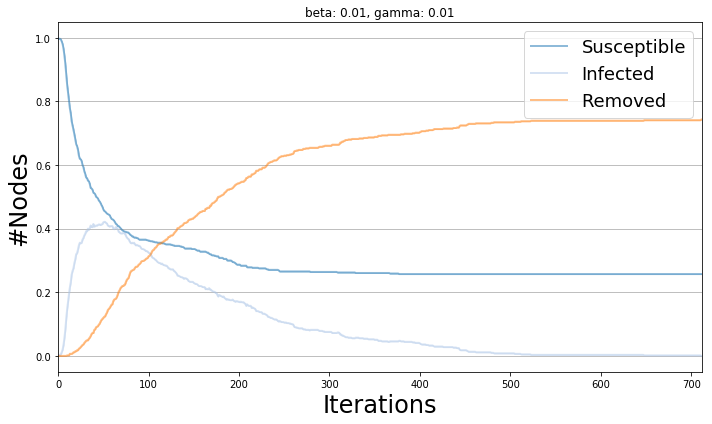

In [44]:
viz = DiffusionTrend(sir_model_Newark, trends_Newark)
plt.figure(figsize=(10,6))
p = viz.plot()
plt.show(p)

### 2.4

4. How many iterations did it take for the infection to die out in the previous question? How many nodes did the infection spread to in total? How many iterations did it take for the outbreak peak (in terms of number of nodes infected)? [<span style="color:blue">Analytical</span>] [3]

In [87]:
print('Number of iterations: {} (as of this model)'.format(model_iterations_Newark[-1]['iteration']))
print('Number of infected nodes: {}'.format(model_iterations_Newark[-1]['node_count'][2]))
max_infected_Newark = max([model_iterations_Newark[i]['node_count'][1] for i in range(len(model_iterations_Newark))])
print('Outbreak peak: {} nodes indected'.format(max_infected_Newark))

Number of iterations: 711 (as of this model)
Number of infected nodes: 453
Outbreak peak: 257 nodes indected


### 2.5

5. Using the AverageOverSimulations and PlotTrends functions provided below, plot the averaged trends for an outbreak beginning at Newark. Use the same model initialized in Question 3. Choose the number of iterations inline with what you identified in Question 4. Average over 100 simulations. [<span style="color:red">Technical</span>] [1]

In [45]:
n_nodes = len(G_USFlight.nodes())

In [55]:
CountDictionary_Newark = AverageOverSimulations(sir_model_Newark, n_nodes, n_iterations=n_interation_Newark, n_simulations = 100)

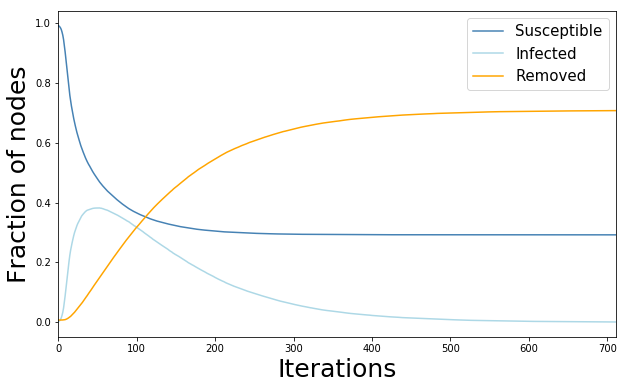

In [47]:
PlotTrends(CountDictionary_Newark, title = None)

### 2.6

6. In the averaged plots, does the outbreak seem to die out after the same number of iterations as the single run (Question 3)? Is the total fraction of nodes infected the same as what you identified in Question 4. Does the peak in the number of infected nodes occur at the same number of iterations? [<span style="color:blue">Analytical</span>] [3]

Yes, very similarly, it dies out after around 700 iterations.
With a number of nodes of 610, we see that at its peak, the fraction is abot 38%, which is around the 257 calculated above.


In [92]:
max_infected_Newark = max([model_iterations_Newark[i]['node_count'][1] for i in range(len(model_iterations_Newark))])
infected_Newark = {model_iterations_Newark[i]['iteration']:model_iterations_Newark[i]['node_count'][1] for i in range(len(model_iterations_Newark))}
iteration_max = list(infected_Newark.keys())[list(infected_Newark.values()).index(max_infected_Newark)]
iteration_max

51

Looking at the graph, the peak value also seem to appear at around 50 iterations

### 2.7

7. Initialize a model in which the outbreak starts at Minot, North Dakota. Use the same values of $\beta$ and $\gamma$ as you have previously. Use the AverageOverSimulations and PlotTrends functions to run this model and plot its averaged trends. Use the same number of iterations and simulation runs as you did for Newark in Question 5. [<span style="color:red">Technical</span>] [1]

In [48]:
infected_node = [Minot]
graph = G_USFlight
sir_model_Minot, n_interation_Minot, model_iterations_Minot = infection_model(infected_node, graph)
print('the number of iteration needed is {}' .format(n_interation_Minot))

the number of iteration needed is 659


In [49]:
CountDictionary_Minot = AverageOverSimulations(sir_model_Minot, n_nodes, n_iterations=n_interation_Newark, n_simulations = 100)

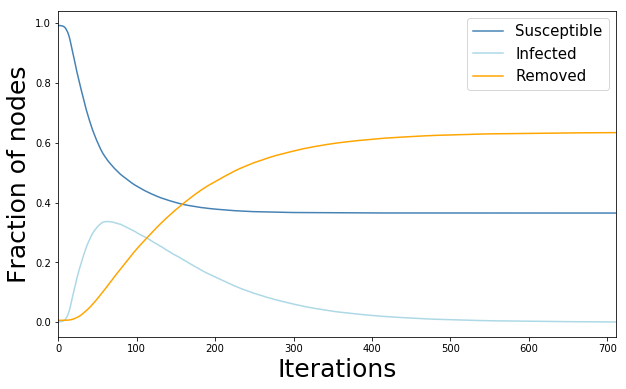

In [50]:
PlotTrends(CountDictionary_Minot, title = None)

### 2.8

In [88]:
print('Newark: {} iterations, Minot: {} iterations'.format(n_interation_Newark,n_interation_Minot))

Newark: 711 iterations, Minot: 659 iterations


Minot needed less iterations

In [89]:
max_infected_Minot = max([model_iterations_Minot[i]['node_count'][1] for i in range(len(model_iterations_Minot))])
print('Outbreak peak: {} nodes indected'.format(max_infected_Minot))

Outbreak peak: 232 nodes indected


Minot had less infected node as well

### 2.9

9. Use the PlotComparison function found below to directly compare the trends obtained for Newark and Minot. First make a plot in which x_max is set to the total number of iterations used in the models. Second, make a plot in which x_max is set to only 25. [<span style="color:red">Technical</span>] [1]

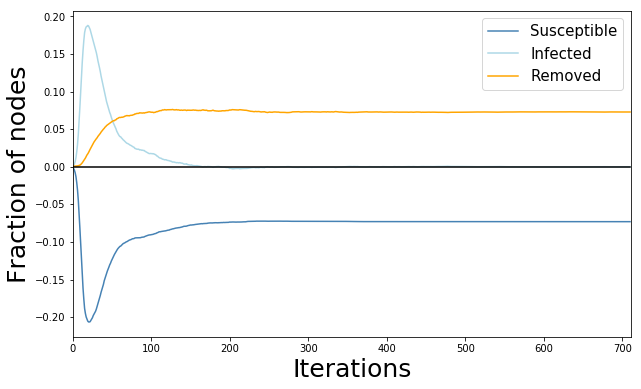

In [51]:
PlotComparison(CountDictionary_Newark, CountDictionary_Minot, title=None, x_max = n_interation_Newark)

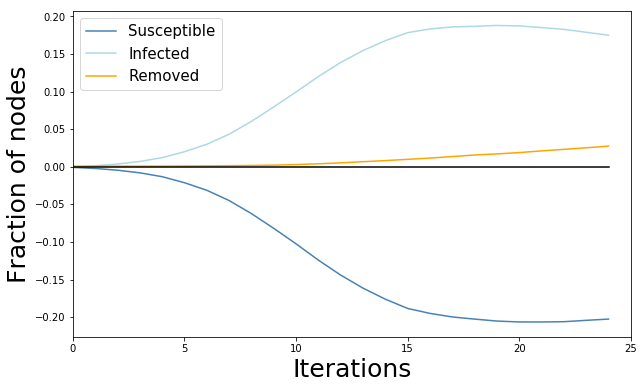

In [52]:
PlotComparison(CountDictionary_Newark, CountDictionary_Minot, title=None, x_max = 25)

### 2.10

10. Read these plots carefully. What does the asymptotic value of the "recovered curve" tell us? Which outbreak reaches further? Which outbreak peaks more quickly? Is there a simple statistics/measure that may explain the differences we see between these two outbreaks? [<span style="color:blue">Analytical</span>] [3]

The asymptotic value shows that at some point, there is constant number of nodes removed/recovered more in newark than minot. We can see that the difference of nodes infected is null, which means at some point the infection doesn't really depend on the start node anymore. However, we see that the outbreak is much faster in newark than minot, which explains the positivle values.
The degree measure is cerainly the cause, Newark being way more connected than Minot


### 2.11

11. Now initialize a model in which the outbreak starts at Chicago. Use the same values of $\beta$ and $\gamma$ as you have previously. Use the AverageOverSimulations and PlotTrends functions to run this model and plot its averaged trends. Use the same number of iterations and simulation runs as you did for Newark in Questions 5 and 7. [<span style="color:red">Technical</span>] [1]

In [53]:
infected_node = [Chicago]
graph = G_USFlight
sir_model_Chicago, n_interation_Chicago, model_iterations_Chicago = infection_model(infected_node, graph)
print('the number of iteration needed is {}' .format(n_interation_Chicago))

the number of iteration needed is 698


In [56]:
CountDictionary_Chicago = AverageOverSimulations(sir_model_Chicago, n_nodes, n_iterations=n_interation_Newark, n_simulations = 100)

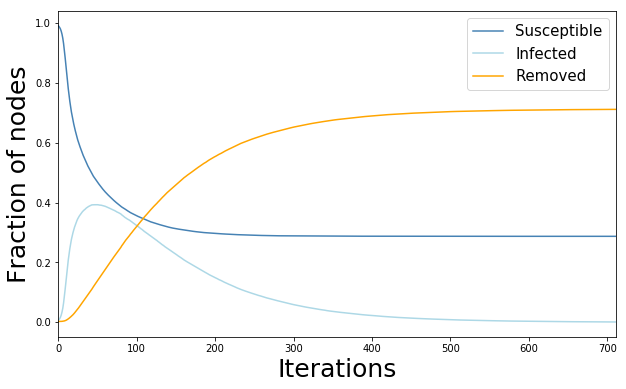

In [57]:
PlotTrends(CountDictionary_Chicago, title = None)

### 2.12

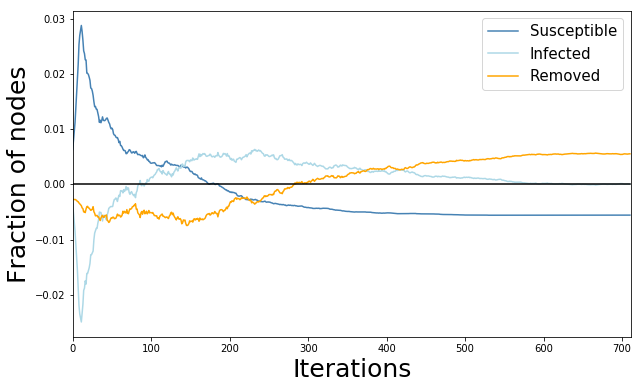

In [58]:
PlotComparison(CountDictionary_Newark, CountDictionary_Chicago, title=None, x_max = n_interation_Newark)

The ooutbreak is way faster in Chicago than Newark, but it tends to go to 0 slowly.
Chicago being in the center of the USA, this could have an impact on the way faster outbreak than in Newark, being the eastside, thus less in the middle

----
## Problem 3
13 points.

In this problem you will explore the simple threshold model on the social network: 'fb_combined.txt'.

1. Using ndlib, set up a threshold model with $q=0.33$. Initialize the model such that 10% of the nodes start infected. Run for 200 iterations. Plot the diffusion trend. _hint_: See the example [here](http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/Threshold.html) [<span style="color:red">Technical</span>] [2]
2. Does the outbreak take over the entire network? Run the simulation two or three more times. Do you get different results? [<span style="color:blue">Analytical</span>] [1]
3. Now we will look for the most influential node in the network. To do this, build a loop over all of the nodes in the network. In each iteration of the loop, initialize the model from scratch (this is important! you don't want to carry over any node states) and start the simulation with only the loop node infected. Run the simulation for __20__ (not 200!) iterations and record how many nodes end up infected. [<span style="color:red">Technical</span>] [2]
4. Which node is the most influential? What percentage of the network does its cascade infect? What is its degree? Check a couple of other basic node properties (_ex_. closeness, betweenness, PageRank, _etc_.). Is the most influential node unusual in any of these measures? [<span style="color:blue">Analytical</span>] [2]
5. We will now look for the set of 5 nodes that are most influential (as a group) by way of a greedy algorithm. Pattern your solution on this pseudo code:
>MostInfluentialNodes = [ ]
>
>while len(MostInfluentialNodes) < 5:
>
>>MaxNode = None
>>
>>for LoopNode in Network:
>>
>>>initialize model
>>>
>>>infect all nodes already in MostInfluentialNodes
>>>
>>>infect LoopNode as well
>>>
>>>run simulation for 20 iterations
>>>
>>>is the number of infected the largest you've seen in this iteration of the while loop? If so, LoopNode becomes MaxNode
>>
>>append MaxNode to MostInfluentialNodes
>
>[<span style="color:red">Technical</span>] [3]
6. Which set of 5 nodes emerge as the most influential? What percentage of the network does their cascade infect? How does this compare to the average reach of randomly infecting 10% of the nodes as done in Questions 1 and 2. [<span style="color:blue">Analytical</span>] [1] 
7. What is the degree of the most influential nodes? How far apart are they in the network (print the pairwise distances)? Do they stand out for any other basic node properties/centrality measures? Test at least 2 or 3 measures. [<span style="color:blue">Analytical</span>] [2]


#### Problem 3 Grades

3.1) None/2

3.2) None/1

3.3) None/2

3.4) None/2

3.5) None/3

3.6) None/1

3.7) None/2

Total: None/13

In [ ]:
Problem3Score = None

---

In [4]:
import ndlib.models.epidemics.ThresholdModel as th
import ndlib.models.ModelConfig as mc

FB_Network = nx.read_edgelist('fb_combined.txt', create_using=nx.Graph(), nodetype=int)

---

### 3.1

1. Using ndlib, set up a threshold model with $q=0.33$. Initialize the model such that 10% of the nodes start infected. Run for 200 iterations. Plot the diffusion trend. _hint_: See the example [here]

In [5]:
def th_model(Graph,perc_infected,threshold, n_iterations,start_infected_nodes):
    model = th.ThresholdModel(Graph)
    config = mc.Configuration()
    if start_infected_nodes == None:
        config.add_model_parameter('percentage_infected', perc_infected)
    else:
        config.add_model_initial_configuration("Infected", start_infected_nodes)

    for i in Graph.nodes(): 
        config.add_node_configuration("threshold", i, threshold)

    model.set_initial_status(config)
    iterations = model.iteration_bunch(n_iterations)
    return iterations

In [6]:
Graph = FB_Network
perc_infected = 0.1
threshold = 0.33
start_infected_nodes = None
n_iterations = 200
iterations1 = th_model(Graph,perc_infected,threshold, n_iterations,start_infected_nodes)


In [65]:
print('number of infected nodes after {} iterations: {}'.format(n_iterations,iterations1[-1]['node_count'][1]))

number of infected nodes after 200 iterations: 117


### 3.2

In [66]:
for i in range(3):
    Graph = FB_Network
    perc_infected = 0.1
    threshold = 0.33
    start_infected_nodes = None
    n_iterations = 200
    iterations1 = th_model(Graph,perc_infected,threshold, n_iterations,start_infected_nodes)
    print('Simulation %i' %i)
    print('number of infected nodes after {} iterations: {}'.format(n_iterations,iterations1[-1]['node_count'][1]))
    print('------------------')
    print(' ')

Simulation 0
number of infected nodes after 200 iterations: 127
------------------
 
Simulation 1
number of infected nodes after 200 iterations: 107
------------------
 
Simulation 2
number of infected nodes after 200 iterations: 68
------------------
 


It clearly does not affect the whole network but we can see that the number of nodes varies extremely. It probably comes from the randomness of choosing the starting infected nodes.

### 3.3

3. Now we will look for the most influential node in the network. To do this, build a loop over all of the nodes in the network. In each iteration of the loop, initialize the model from scratch (this is important! you don't want to carry over any node states) and start the simulation with only the loop node infected. Run the simulation for __20__ (not 200!) iterations and record how many nodes end up infected. [<span style="color:red">Technical</span>] [2]

In [67]:
Graph = FB_Network
perc_infected = 0.1
threshold = 0.33
n_iterations = 20
influence = {}
for start_infected_node in Graph.nodes():
    iterations = th_model(Graph,perc_infected,threshold, n_iterations,[start_infected_node])
    influence[start_infected_node] = iterations[-1]['node_count'][1]


In [68]:
import operator

In [69]:
influence = sorted(influence.items(),key = operator.itemgetter(1),reverse = True)

In [70]:
print('The most influential node is: {}, with {} nodes infected'.format(influence[0][0],influence[0][1]))

The most influential node is: 348, with 30 nodes infected


### 3.4

4. Which node is the most influential? What percentage of the network does its cascade infect? What is its degree? Check a couple of other basic node properties (_ex_. closeness, betweenness, PageRank, _etc_.). Is the most influential node unusual in any of these measures? [<span style="color:blue">Analytical</span>] [2]

In [74]:
dict(FB_degree)

{1: 16,
 48: 21,
 53: 30,
 54: 7,
 73: 9,
 88: 19,
 92: 20,
 119: 61,
 126: 6,
 133: 17,
 194: 18,
 236: 36,
 280: 42,
 299: 19,
 315: 55,
 322: 71,
 346: 26,
 2: 9,
 20: 14,
 115: 20,
 116: 16,
 149: 13,
 226: 13,
 312: 25,
 326: 18,
 333: 7,
 343: 17,
 3: 16,
 9: 56,
 25: 68,
 26: 67,
 67: 75,
 72: 23,
 85: 13,
 122: 62,
 142: 42,
 170: 45,
 188: 47,
 200: 56,
 228: 2,
 274: 13,
 283: 4,
 323: 38,
 4: 9,
 78: 8,
 152: 4,
 181: 9,
 195: 8,
 218: 8,
 273: 8,
 275: 9,
 306: 8,
 328: 8,
 5: 12,
 87: 12,
 156: 11,
 158: 24,
 169: 37,
 180: 19,
 187: 15,
 204: 21,
 213: 38,
 235: 4,
 316: 1,
 6: 5,
 89: 7,
 95: 5,
 147: 5,
 219: 5,
 319: 7,
 7: 19,
 22: 10,
 31: 22,
 38: 8,
 65: 11,
 103: 15,
 129: 6,
 136: 21,
 168: 10,
 246: 13,
 291: 35,
 304: 54,
 308: 23,
 339: 26,
 340: 5,
 347: 6,
 8: 7,
 91: 7,
 110: 4,
 193: 4,
 201: 3,
 245: 4,
 259: 7,
 264: 4,
 21: 64,
 30: 16,
 56: 77,
 66: 14,
 69: 9,
 75: 13,
 79: 11,
 105: 13,
 113: 39,
 128: 27,
 134: 18,
 141: 27,
 148: 19,
 161: 24,
 176

In [76]:
most_influential = influence[0][0]
print('Most influential node {}, nodes infected: {} '.format(influence[0][0],influence[0][1]))
print('------------------------')

# perc infecected

n_nodes = len(influence)
perc_infected = float(influence[0][1]/n_nodes)*100
print('Percentage of the network infected: {:.3f} %'.format(perc_infected))

#degree
FB_degree = dict(FB_Network.degree())
ranked_degree = [sorted(FB_degree.items(),key = operator.itemgetter(1),reverse = True)[i][0] for i in range(len(FB_degree))]
rank_degree_most = ranked_degree.index(most_influential)
print('Degree of node {}: {} '.format(most_influential,FB_degree[most_influential]))
print('Rank in the Network: {}'.format(rank_degree_most+1))
print('------------------------')

# closeness
FB_closeness = dict(nx.closeness_centrality(FB_Network))
ranked_closeness = [sorted(FB_closeness.items(),key = operator.itemgetter(1),reverse = True)[i][0] for i in range(len(FB_degree))]
rank_closeness_most = ranked_closeness.index(most_influential)
print('Closeness of node {}: {:.3f} '.format(most_influential,FB_closeness[most_influential]))
print('Rank in the Network: {}'.format(rank_closeness_most+1))
print('------------------------')

#betweenness
FB_betweenness_centrality = dict(nx.betweenness_centrality(FB_Network))
ranked_betweenness = [sorted(FB_betweenness_centrality.items(),key = operator.itemgetter(1),reverse = True)[i][0] for i in range(len(FB_degree))]
rank_betweenness_most = ranked_betweenness.index(most_influential)
print('Betweenness of node {}: {:.3f} '.format(most_influential,FB_betweenness_centrality[most_influential]))
print('Rank in the Network: {}'.format(rank_betweenness_most+1))
print('------------------------')

# PageRank
FB_pagerank = dict(nx.pagerank(FB_Network))
ranked_pagerank = [sorted(FB_pagerank.items(),key = operator.itemgetter(1),reverse = True)[i][0] for i in range(len(FB_degree))]
rank_pagerank_most = ranked_pagerank.index(most_influential)
print('PageRank of node {}: {:.3f} '.format(most_influential,FB_pagerank[most_influential]))
print('Rank in the Network: {}'.format(rank_pagerank_most+1))
print('------------------------')

Most influential node 348, nodes infected: 30 
------------------------
Percentage of the network infected: 6.173 %
Degree of node 348: 156 
Rank in the Network: 1
------------------------
Closeness of node 348: 0.259 
Rank in the Network: 107
------------------------
Betweenness of node 348: 0.356 
Rank in the Network: 1
------------------------
PageRank of node 348: 0.020 
Rank in the Network: 1
------------------------


The most influential is number one in many centrality measure, except for closeness, in which is very far 107.

### 3.5

5. We will now look for the set of 5 nodes that are most influential (as a group) by way of a greedy algorithm. Pattern your solution on this pseudo code:
>MostInfluentialNodes = [ ]
>
>while len(MostInfluentialNodes) < 5:
>
>>MaxNode = None
>>
>>for LoopNode in Network:
>>
>>>initialize model
>>>
>>>infect all nodes already in MostInfluentialNodes
>>>
>>>infect LoopNode as well
>>>
>>>run simulation for 20 iterations
>>>
>>>is the number of infected the largest you've seen in this iteration of the while loop? If so, LoopNode becomes MaxNode
>>
>>append MaxNode to MostInfluentialNodes
>
>[<span style="color:red">Technical</span>] [3]

In [81]:
MostInfluentialNodes = [ ]
Graph = FB_Network
n_iterations = 20
nodelist = list(Graph.nodes())

while len(MostInfluentialNodes) < 5:

    MaxNode = None
    MaxInfected = 0

    for node in nodelist:
        start_infected_nodes = [node]
        
        start_infected_nodes.extend(MostInfluentialNodes)
        
        iterations = th_model(Graph,perc_infected,threshold, n_iterations,start_infected_nodes)
        
        infected = iterations[-1]['node_count'][1]
        
        if infected > MaxInfected:
            
            MaxNode = node
            
            MaxInfected = infected
            
    MostInfluentialNodes.append((MaxNode,MaxInfected))
    nodelist.remove(MaxNode)
    
            
MostInfluentialNodes
        
        

[(348, 30), (89, 9), (319, 10), (23, 11), (230, 11)]

### 3.6

6. Which set of 5 nodes emerge as the most influential? What percentage of the network does their cascade infect? How does this compare to the average reach of randomly infecting 10% of the nodes as done in Questions 1 and 2. [<span style="color:blue">Analytical</span>] [1] 

In [ ]:
start_infected_nodes = [MostInfluentialNodes[i][0] for i in range(len(MostInfluentialNodes))]

In [ ]:
Graph = FB_Network
n_iterations = 200
perc_infected = None
threshold = 0.33
iterations_influential = th_model(Graph,perc_infected,threshold, n_iterations,start_infected_nodes)

In [ ]:
cascade_effect = iterations_influential[-1]['node_count'][1]
print('Effect of the most influential nodes: {} infected'.format(cascade_effect))
print('Percentage: {:.1f}%'.format(float(cascade_effect/n_nodes)*100))

By randomly selecting 10%, the number of infected nodes is higher than taking only the 5 most influencials. Indeed, 10% represents 48 nodes, almost ten times higher than the 5 most influentials

### 3.7

7. What is the degree of the most influential nodes? How far apart are they in the network (print the pairwise distances)? Do they stand out for any other basic node properties/centrality measures? Test at least 2 or 3 measures. [<span style="color:blue">Analytical</span>] [2]

In [ ]:
import pandas as pd
colsOD = ['Node']
colsOD.extend(start_infected_nodes)
OD = pd.DataFrame(columns= colsOD)
for i in range(0,len(start_infected_nodes)):
    distances = []
    origin = start_infected_nodes[i]
    distances.append(origin)
    for j in range(0,len(start_infected_nodes)):
        dest = start_infected_nodes[j]
        distances.append(nx.shortest_path_length(FB_Network, source=origin, target=dest))
        
    OD.loc[i] = distances
OD

In [ ]:
measures = ['Degree','Closeness','Betweeness','PageRank']
colsM = ['Node','Degree','Closeness','Betweeness','PageRank']
DFMeasure = pd.DataFrame(columns= colsM)
ranks = {}

# degree
FB_degree = dict(FB_Network.degree())
ranked_degree = [sorted(FB_degree.items(),key = operator.itemgetter(1),reverse = True)[i][0] for i in range(len(FB_degree))]
ranks['Degree'] = {node: ranked_degree.index(node)+1 for node in start_infected_nodes}
         

# closeness
FB_closeness = dict(nx.closeness_centrality(FB_Network))
ranked_closeness = [sorted(FB_closeness.items(),key = operator.itemgetter(1),reverse = True)[i][0] for i in range(len(FB_degree))]
ranks['Closeness'] = {node: ranked_closeness.index(node)+1 for node in start_infected_nodes}

#betweenness
FB_betweenness_centrality = dict(nx.betweenness_centrality(FB_Network))
ranked_betweenness = [sorted(FB_betweenness_centrality.items(),key = operator.itemgetter(1),reverse = True)[i][0] for i in range(len(FB_degree))]
ranks['Betweeness'] = {node: ranked_betweenness.index(node)+1 for node in start_infected_nodes}

# PageRank
FB_pagerank = dict(nx.pagerank(FB_Network))
ranked_pagerank = [sorted(FB_pagerank.items(),key = operator.itemgetter(1),reverse = True)[i][0] for i in range(len(FB_degree))]
ranks['PageRank'] = {node: ranked_pagerank.index(node)+1 for node in start_infected_nodes}

i = 0
for node in start_infected_nodes:
    measures_line = [node]
    measures_node = [ranks[meas][node] for meas in measures]
    measures_line.extend(measures_node)
    DFMeasure.loc[i] = measures_line
    i += 1
DFMeasure    

In [ ]:
plt.figure(figsize=(10,6))
for node in start_infected_nodes:
    plt.plot(range(len(measures)),[ranks[meas][node] for meas in measures], label = node)
plt.xticks(range(len(measures)), measures)    
plt.xlabel('Node', fontsize=25)
plt.ylabel('Rank', fontsize=25)
plt.legend(fontsize=15)
plt.show()

From the figure above, it seems like the betweenness is the most important factors, the nodes have a very good rank in it.
It also appears that the close nodes (from a distance point of view) tend to have the same centrality measures

---

In [ ]:
#FinalScore = Problem1Score + Problem2Score + Problem3Score
#print("Final score is",FinalScore,"out of 50")